<a href="https://colab.research.google.com/github/lbdkn8/nlp_experiments/blob/main/Lebedkin_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from lxml import etree

In [6]:
from typing import List, Tuple

In [7]:
%pip install spacy-udpipe
%pip install pymorphy2==0.8

import spacy_udpipe
import string, re

spacy_udpipe.download("ru-syntagrus") 
nlp = spacy_udpipe.load("ru-syntagrus")

     |████████████████████████████████| 307kB 3.8MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp36-cp36m-linux_x86_64.whl size=5625198 sha256=f05bb132408255ee44a2d528ddfdbac1fe4e0e18d5792c1b05c9041470395d6c
  Stored in directory: /root/.cache/pip/wheels/0c/9d/db/6d3404c33da5b7adb6c6972853efb6a27649d3ba15f7e9bebb
Successfully built ufal.udpipe
     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 7.1MB 5.0MB/s 
Downloaded pre-trained UDPipe model for 'ru-syntagrus' language


In [8]:
def chewable(s):                                                # Убираем лишнее 
  lemmas = [token.lemma_ for token in nlp(s)]
  s_lemmd = ' '.join(lemmas)                                                
  webs = '(\S+\.\S+\.?\S+[\s^\v]?)'
  nums = '(\d+[\s^\v]?)'
  re_webs = re.compile(webs)                                    # Убираем сслыки
  re_pnct = re.compile('[%s]' % re.escape(string.punctuation))  # Пунктуацию
  re_nums = re.compile(nums)                                    # Почему-то числа становились наиболее значимыми признаками - убираю
  s_dewebbed = re_webs.sub('', s_lemmd)
  s_stripped = re_pnct.sub('', s_dewebbed)
  s_denummed = re_nums.sub('', s_stripped)
  return s_denummed

In [9]:
def load_sentirueval_2016(file_name: str) -> Tuple[List[str], List[str]]:
    texts = []
    labels = []
    with open(file_name, mode='rb') as fp:
        xml_data = fp.read()
    root = etree.fromstring(xml_data)
    for database in root.getchildren():
        if database.tag == 'database':
            for table in database.getchildren():
                if table.tag != 'table':
                    continue
                new_text = None
                new_label = None
                for column in table.getchildren():
                    if column.get('name') == 'text':
                        new_text = chewable(column.text)
                        if new_label is not None:
                            break
                    elif column.get('name') not in {'id', 'twitid', 'date'}:
                        if new_label is None:
                            label_candidate = str(column.text).strip()
                            if label_candidate in {'0', '1', '-1'}:
                                new_label = 'negative' if label_candidate == '-1' else \
                                    ('positive' if label_candidate == '1' else 'neutral')
                                if new_text is not None:
                                    break
                if (new_text is None) or (new_label is None):
                    raise ValueError('File `{0}` contains some error!'.format(file_name))
                texts.append(new_text)
                labels.append(new_label)
            break
    return texts, labels

In [10]:
fXML = '/content/drive/My Drive/bank_train_2016.xml'

In [11]:
texts, labels = load_sentirueval_2016(fXML)

In [12]:
print('Number of texts is {0}, number of labels is {1}.'.format(len(texts), len(labels)))

Number of texts is 9392, number of labels is 9392.


In [13]:
import random

In [14]:
for idx in random.choices(list(range(len(texts))), k=20):
    print('{0} => {1}'.format(labels[idx], texts[idx]))

neutral =>  россия сми  Газпромбанк дать Сечина в кредит  миллион на акция
neutral => RT rucontinental  Сбербанк начать выпуск карта на база российский платежный система ПРО  
negative => мдаа  видеть реклама ВТБ я реально усомниться в то  Россия  это русский государство   
neutral => ставка по авто кредит сбербанк 
positive => по состояние на час утро июнь рейтинг банк Бурятия  за который голосовать посетитель сайт «Байкал Финанс»  возглавить Сбербанк Росс
neutral => Mastercard  Сбербанк РФ 
neutral => перекредитование потребительский кредит альфа банк 
neutral => мгновенный кредитный карта сбербанок 
neutral =>  новость клиент НМБ делить Сбербанк и МДМ Банк  новокузнецк
negative =>  Сбербанк и  ВТБ попасть под санкция ЕС    FFRU
neutral => брать кредит альфа банк город спасск дальний
neutral => заголовок новость  почта Россия намерен получить банковский лицензия  x xx  а посылка кто заниматься быть   yyy  Сбербанк   
neutral => findozor ЦБ поддержать попасть под санкция ВТБ  Сбербанк

In [15]:
positive_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'positive']
negative_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'negative']

In [16]:
for cur in positive_tweets[:5]: print(cur)

sawikshuster YevhenS главный чтобы банк СБЕР и ВТБ   
самый выгодный автокредит в втб 
легко можно получить денежный кредит ы вт банк
снижение процентный ставка по кредит на недвижимость сбербанк 
в наш сбербанк прийти американец и просить сфоткаться с он у банкомат  D я васто быть в шок и на фотка полюбому получиться смешной xD


In [17]:
for cur in negative_tweets[:5]: print(cur)

ShtirliZ Zhukovaolga winzard tereshenkov обязательно про сбербанк писать  временами хлестко интерать магазин финт выкручивать 
UmkaAlfariusigorsechin втб и сбер точно  вопрос  блокировка операция или запрет на кредит 
Канада ввести санкция против Газпромбанк  ВЭБ  Новатэк и российский оборонный компания
RT letokot  если Сбер и ВТБ попасть под санкция  быть жоп
RT tvru   Канада ввести санкция против оборонный и сырьевой компания и банк РФ  среди они  в частность    Газпромбанк     Внешэк …


In [18]:
import nltk
from nltk import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=word_tokenize)

In [21]:
vectorizer.fit(texts)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7f690e0d7158>,
                vocabulary=None)

In [22]:
print(vectorizer.get_feature_names()[0:20])

['a', 'abaradagaнлат', 'aberadez', 'abetaa', 'abncapital', 'abramovdeputat', 'abunyasha', 'abysov', 'adagamov', 'adairrasi', 'adaron', 'aday', 'adenisenko', 'adindex', 'adlarguan', 'admeru', 'admitad', 'adubter', 'adworningju', 'aeroflot']


In [23]:
print(len(vectorizer.get_feature_names()))

8698


In [24]:
X = vectorizer.transform(texts)

In [25]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [26]:
print(texts[0])

брать кредит тюмень альфа банк


In [27]:
print(X[0])

  (0, 1815)	1
  (0, 1965)	1
  (0, 2144)	1
  (0, 4118)	1
  (0, 7898)	1


In [28]:
print(vectorizer.get_feature_names()[6321])

пришлть


In [29]:
print(vectorizer.get_feature_names()[6000])

попадаться


In [30]:
print(vectorizer.get_feature_names()[5000])

нижний


In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
transformer = TfidfTransformer().fit(X)

In [33]:
X_transformed = transformer.transform(X)

In [34]:
print(X_transformed[0])

  (0, 7898)	0.7639100517232897
  (0, 4118)	0.2173288930139871
  (0, 2144)	0.4039888226437941
  (0, 1965)	0.24576972473891776
  (0, 1815)	0.38157549543710667


In [35]:
print(vectorizer.get_feature_names()[4000])

конверт


In [36]:
print(vectorizer.get_feature_names()[7199])

скупка


In [37]:
tokens_with_IDF = list(zip(vectorizer.get_feature_names(), transformer.idf_))

In [38]:
for feature, idf in tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.049108 => a
9.454573 => abaradagaнлат
9.454573 => aberadez
9.454573 => abetaa
9.454573 => abncapital
9.454573 => abramovdeputat
9.454573 => abunyasha
9.454573 => abysov
9.454573 => adagamov
9.454573 => adairrasi
9.454573 => adaron
9.454573 => aday
9.454573 => adenisenko
9.454573 => adindex
9.454573 => adlarguan
9.454573 => admeru
9.454573 => admitad
9.454573 => adubter
9.454573 => adworningju
8.538282 => aeroflot


In [39]:
sorted_tokens_with_IDF = sorted(tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [40]:
for feature, idf in sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => abaradagaнлат
9.454573 => aberadez
9.454573 => abetaa
9.454573 => abncapital
9.454573 => abramovdeputat
9.454573 => abunyasha
9.454573 => abysov
9.454573 => adagamov
9.454573 => adairrasi
9.454573 => adaron
9.454573 => aday
9.454573 => adenisenko
9.454573 => adindex
9.454573 => adlarguan
9.454573 => admeru
9.454573 => admitad
9.454573 => adubter
9.454573 => adworningju
9.454573 => afyanik
9.454573 => agatacrysty


In [41]:
from sklearn.feature_selection import SelectPercentile, chi2

In [42]:
selector = SelectPercentile(chi2, percentile=20)

In [43]:
selector.fit(X_transformed, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f690d5f7268>)

In [44]:
selected_tokens_with_IDF = [tokens_with_IDF[idx] for idx in selector.get_support(indices=True)]

In [45]:
print(len(selected_tokens_with_IDF))

1740


In [46]:
for feature, idf in selected_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => aberadez
9.454573 => abunyasha
9.454573 => adworningju
8.761426 => akselenc
9.454573 => alexigrey
4.905973 => alfabank
6.592372 => alfabankby
9.454573 => alushin
9.454573 => andreymalgin
9.454573 => andreytr
8.761426 => antimaydan
9.049108 => apple
9.454573 => appstore
9.454573 => arhangelmisha
9.454573 => artemycheros
8.761426 => awards
9.049108 => balamot
9.454573 => bankitb
8.538282 => bbb
9.454573 => behlbride


In [47]:
selected_and_sorted_tokens_with_IDF = sorted(selected_tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [68]:
for feature, idf in selected_and_sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => aberadez
9.454573 => abunyasha
9.454573 => adworningju
9.454573 => alexigrey
9.454573 => alushin
9.454573 => andreymalgin
9.454573 => andreytr
9.454573 => appstore
9.454573 => arhangelmisha
9.454573 => artemycheros
9.454573 => bankitb
9.454573 => behlbride
9.454573 => bosacoworavu
9.454573 => bullethunter
9.454573 => buribedixuk
9.454573 => catspower
9.454573 => cgillenpiy
9.454573 => chumikov
9.454573 => citybusicyti
9.454573 => come


In [280]:
import time

# ~ Testing Logistic Regression (without search) ~



In [281]:
from sklearn.linear_model import LogisticRegression

In [282]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [283]:
X_transformed_and_selected = selector.transform(X_transformed)

In [284]:
cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001,
                   verbose=True, warm_start=False)

In [285]:
classes_list = list(cls.classes_)

In [286]:
print(classes_list)

['negative', 'neutral', 'positive']


In [287]:
texts_for_testing, labels_for_testing = load_sentirueval_2016('/content/drive/My Drive/banks_test_etalon.xml')

In [288]:
from sklearn.pipeline import Pipeline

In [289]:
pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls)
    ]
)

In [290]:
from sklearn.metrics import roc_curve
import numpy as np

In [291]:
probabilities = pipeline_for_se.predict_proba(texts_for_testing)

In [292]:
y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]

In [293]:
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

In [294]:
y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

In [295]:
y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

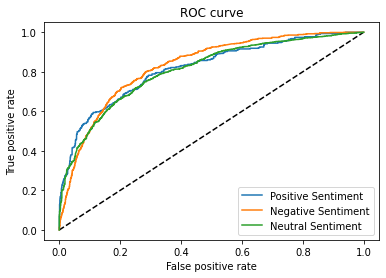

In [296]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [297]:
from sklearn.metrics import f1_score
predicted_labels = pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.744944
F1-macro = 0.556631


In [298]:
from sklearn.metrics import classification_report
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.618893  0.495437  0.550326       767
     neutral   0.772589  0.909294  0.835386      2238
    positive   0.815385  0.172078  0.284182       308

    accuracy                       0.744944      3313
   macro avg   0.735622  0.525603  0.556631      3313
weighted avg   0.740985  0.744944  0.718147      3313



# ~ gCV + LogRegr ~

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')
gcv_lr = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3], 'penalty': ['l1', 'l2', 'elasticnet']},
    scoring=f1_macro_scorer,
    n_jobs=-1,
)

In [300]:
gcv_lr_tp1 = time.time()
gcv_lr.fit(X_transformed_and_selected, labels)
gcv_lr_tp2 = time.time()
print(f'Time needed for search: {gcv_lr_tp2 - gcv_lr_tp1}s')

Time needed for search: 6.408043384552002s


In [301]:
gcv_lr_bp = gcv_lr.best_params_
print(gcv_lr_bp)

{'C': 100.0, 'penalty': 'l2'}


In [302]:
bcls_gcv_lr = LogisticRegression(
                                 solver='liblinear', 
                                 verbose=True, 
                                 C=gcv_lr_bp['C'], 
                                 penalty=gcv_lr_bp['penalty']
                                )

In [303]:
gcv_lr_tp3 = time.time()
bcls_gcv_lr.fit(X_transformed_and_selected, labels)
gcv_lr_tp4 = time.time()
print(f'Time needed for computation: {gcv_lr_tp4 - gcv_lr_tp3}s')

[LibLinear]Time needed for computation: 0.17966341972351074s


In [304]:
best_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_gcv_lr)
    ]
)

In [305]:
probabilities = best_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

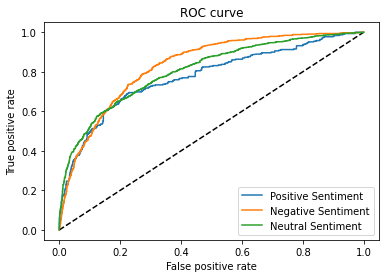

In [306]:
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [307]:
predicted_labels = best_pipeline_for_se.predict(texts_for_testing)
fmi_gcv_lr = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_gcv_lr = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_gcv_lr))
print('F1-macro = {0:.6f}'.format(fma_gcv_lr))

F1-micro = 0.718080
F1-macro = 0.584246


In [308]:
clsrep_gcv_lr = classification_report(labels_for_testing, predicted_labels, digits=6)

In [309]:
print(clsrep_gcv_lr)

              precision    recall  f1-score   support

    negative   0.552664  0.581486  0.566709       767
     neutral   0.809376  0.817694  0.813514      2238
    positive   0.420408  0.334416  0.372514       308

    accuracy                       0.718080      3313
   macro avg   0.594150  0.577865  0.584246      3313
weighted avg   0.713783  0.718080  0.715377      3313



# ~ rCV + LogReg ~

In [310]:
from sklearn.model_selection import RandomizedSearchCV

In [311]:
rcv_lr = RandomizedSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_distributions={
                'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3], 
                'penalty': ['l1', 'l2', 'elasticnet']
                },
    n_iter = 100,
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [312]:
rcv_lr_tp1 = time.time()
rcv_lr.fit(X_transformed_and_selected, labels)
rcv_lr_tp2 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [313]:
print(f'Time needed for search: {rcv_lr_tp2 - rcv_lr_tp1}s')
rcv_lr_bp = rcv_lr.best_params_
print(rcv_lr_bp)

Time needed for search: 5.270565748214722s
{'penalty': 'l2', 'C': 100.0}


In [314]:
bcls_rcv_lr = LogisticRegression(
                                 solver='liblinear', 
                                 verbose=True, 
                                 C=rcv_lr_bp['C'], 
                                 penalty=rcv_lr_bp['penalty']
                                 )
rcv_lr_tp3 = time.time()
bcls_rcv_lr.fit(X_transformed_and_selected, labels)
rcv_lr_tp4 = time.time()
print('Time needed for computations: ', rcv_lr_tp4 - rcv_lr_tp3)

[LibLinear]Time needed for computations:  0.17204594612121582


In [315]:
rand_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_rcv_lr)
    ]
)

In [316]:
probabilities = rand_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

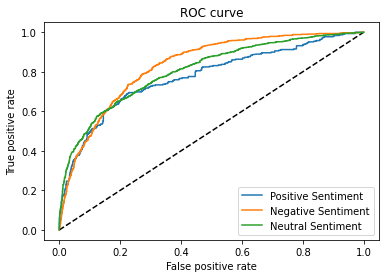

In [317]:
plt.figure(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [318]:
predicted_labels = rand_pipeline_for_se.predict(texts_for_testing)
fmi_rcv_lr = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_rcv_lr = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_rcv_lr))
print('F1-macro = {0:.6f}'.format(fma_rcv_lr))

F1-micro = 0.718080
F1-macro = 0.584246


In [319]:
clsrep_rcv_lr = classification_report(labels_for_testing, predicted_labels, digits=6)
print(clsrep_rcv_lr)

              precision    recall  f1-score   support

    negative   0.552664  0.581486  0.566709       767
     neutral   0.809376  0.817694  0.813514      2238
    positive   0.420408  0.334416  0.372514       308

    accuracy                       0.718080      3313
   macro avg   0.594150  0.577865  0.584246      3313
weighted avg   0.713783  0.718080  0.715377      3313



# ~ gCV + SGDC ~

In [320]:
from sklearn.linear_model import SGDClassifier

In [321]:
gcv_sgdc = GridSearchCV(
    estimator=SGDClassifier(loss='log'),
    param_grid={
                'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1], 
                'penalty': ['l1', 'l2', 'elasticnet']
                },
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [322]:
gcv_sgdc_tp1 = time.time()
gcv_sgdc.fit(X_transformed_and_selected, labels)
gcv_sgdc_tp2 = time.time()

In [323]:
print(f'Time needed for search: {gcv_sgdc_tp2 - gcv_sgdc_tp1}s')
gcv_sgdc_bp = gcv_sgdc.best_params_
print(gcv_sgdc_bp)

Time needed for search: 3.8027780055999756s
{'alpha': 0.0001, 'penalty': 'l1'}


In [324]:
bcls_gcv_sgdc = SGDClassifier( 
                     loss='log',
                     penalty=gcv_sgdc_bp['penalty'],
                     alpha=gcv_sgdc_bp['alpha'],
                     max_iter=1000
                    )

In [325]:
gcv_sgdc_tp3 = time.time()
bcls_gcv_sgdc.fit(X_transformed_and_selected, labels)
gcv_sgdc_tp4 = time.time()

In [326]:
print(f'Time needed for computations: {gcv_sgdc_tp4 - gcv_sgdc_tp3}s')

Time needed for computations: 0.07068109512329102s


In [327]:
sgdc_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_gcv_sgdc)
    ]
)

In [328]:
probabilities = sgdc_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

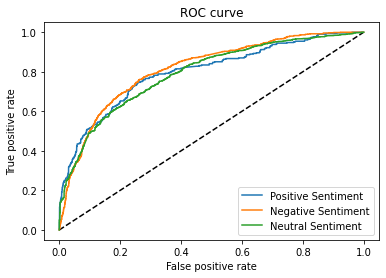

In [329]:
plt.figure(4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [330]:
predicted_labels = sgdc_pipeline_for_se.predict(texts_for_testing)
fmi_gcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_gcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_gcv_sgdc))
print('F1-macro = {0:.6f}'.format(fma_gcv_sgdc))

F1-micro = 0.740115
F1-macro = 0.584782


In [331]:
clsrep_gcv_sgdc = classification_report(labels_for_testing, predicted_labels, digits=6)
print(clsrep_gcv_sgdc)

              precision    recall  f1-score   support

    negative   0.594918  0.518905  0.554318       767
     neutral   0.781869  0.882484  0.829135      2238
    positive   0.669492  0.256494  0.370892       308

    accuracy                       0.740115      3313
   macro avg   0.682093  0.552628  0.584782      3313
weighted avg   0.728140  0.740115  0.722910      3313



# ~ rCV + SGDClassifier ~

In [332]:
from sklearn.linear_model import SGDClassifier

In [333]:
rcv_sgdc = RandomizedSearchCV(
    estimator=SGDClassifier(loss='log'),
    param_distributions={
                'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1], 
                'penalty': ['l1', 'l2', 'elasticnet']
                },
    n_iter = 100,
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [334]:
rcv_sgdc_tp1 = time.time()
rcv_sgdc.fit(X_transformed_and_selected, labels)
rcv_sgdc_tp2 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [335]:
print(f'Time needed for search: {rcv_sgdc_tp2 - rcv_sgdc_tp1}s')
rcv_sgdc_bp = rcv_sgdc.best_params_
print(rcv_sgdc_bp)

Time needed for search: 3.8100650310516357s
{'penalty': 'l1', 'alpha': 0.0001}


In [336]:
bcls_rcv_sgdc = SGDClassifier( 
                     loss='log',
                     penalty=rcv_sgdc_bp['penalty'],
                     alpha=rcv_sgdc_bp['alpha'],
                     max_iter=1000
                    )

In [337]:
rcv_sgdc_tp3 = time.time()
bcls_rcv_sgdc.fit(X_transformed_and_selected, labels)
rcv_sgdc_tp4 = time.time()

In [338]:
print(f'Time needed for computations: {rcv_sgdc_tp4 - rcv_sgdc_tp3}s')

Time needed for computations: 0.06425952911376953s


In [339]:
sgdc_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_rcv_sgdc)
    ]
)

In [340]:
probabilities = sgdc_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

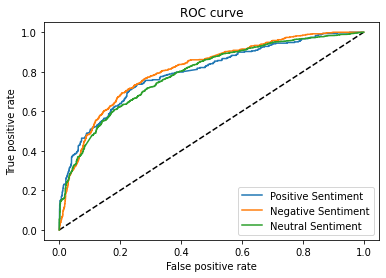

In [341]:
plt.figure(4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [342]:
predicted_labels = sgdc_pipeline_for_se.predict(texts_for_testing)
fmi_rcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_rcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_rcv_sgdc))
print('F1-macro = {0:.6f}'.format(fma_rcv_sgdc))

F1-micro = 0.732267
F1-macro = 0.567577


In [343]:
clsrep_rcv_sgdc = classification_report(labels_for_testing, predicted_labels, digits=6)
print(clsrep_rcv_sgdc)

              precision    recall  f1-score   support

    negative   0.575403  0.512386  0.542069       767
     neutral   0.780430  0.876676  0.825758      2238
    positive   0.612069  0.230519  0.334906       308

    accuracy                       0.732267      3313
   macro avg   0.655967  0.539860  0.567577      3313
weighted avg   0.717311  0.732267  0.714447      3313



# ~ Выводы ~

In [344]:
scheme = '--- {}\nSearch time: {}\nComputation time: {}\nF1-micro = {}\nF1-macro = {}\nReport:\n{}\n' 
print(scheme.format('gCV + LogReg', gcv_lr_tp2-gcv_lr_tp1, gcv_lr_tp4-gcv_lr_tp3, fmi_gcv_lr, fma_gcv_lr, clsrep_gcv_lr))
print(scheme.format('rCV + LogReg', rcv_lr_tp2-rcv_lr_tp1, rcv_lr_tp4-rcv_lr_tp3, fmi_rcv_lr, fma_rcv_lr, clsrep_rcv_lr))
print(scheme.format('gCV + SGDC', gcv_sgdc_tp2-gcv_sgdc_tp1, gcv_sgdc_tp4-gcv_sgdc_tp3, fmi_gcv_sgdc, fma_gcv_sgdc, clsrep_gcv_sgdc))
print(scheme.format('rCV + SGDC', rcv_sgdc_tp2-rcv_sgdc_tp1, rcv_sgdc_tp4-rcv_sgdc_tp3, fmi_rcv_sgdc, fma_rcv_sgdc, clsrep_rcv_sgdc))

--- gCV + LogReg
Search time: 6.408043384552002
Computation time: 0.17966341972351074
F1-micro = 0.7180802897675822
F1-macro = 0.5842455660785356
Report:
              precision    recall  f1-score   support

    negative   0.552664  0.581486  0.566709       767
     neutral   0.809376  0.817694  0.813514      2238
    positive   0.420408  0.334416  0.372514       308

    accuracy                       0.718080      3313
   macro avg   0.594150  0.577865  0.584246      3313
weighted avg   0.713783  0.718080  0.715377      3313


--- rCV + LogReg
Search time: 5.270565748214722
Computation time: 0.17204594612121582
F1-micro = 0.7180802897675822
F1-macro = 0.5842455660785356
Report:
              precision    recall  f1-score   support

    negative   0.552664  0.581486  0.566709       767
     neutral   0.809376  0.817694  0.813514      2238
    positive   0.420408  0.334416  0.372514       308

    accuracy                       0.718080      3313
   macro avg   0.594150  0.577865  0.5